<a href="https://www.kaggle.com/code/hatemamine/scotus-inference-and-evaluation?scriptVersionId=107120612" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:
!pip install torchmetrics --quiet
import torch
from torchmetrics import F1Score
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

#load the embedding for trainset to make support set 
with open('../input/embeddinglexglueeurlex/embeddingsKeyscotus.pickle', 'rb') as handle:
    embeddings_train = pickle.load(handle)
print(embeddings_train.keys())
#load the embedding for validationset to make query set
with open('../input/embeddinglexglueeurlex/embeddingsscotus.pickle', 'rb') as handle:
    embeddings_validation = pickle.load(handle)
print(embeddings_validation.keys())

dict_keys(['embeddingsKey', 'lableskey'])
dict_keys(['embeddings', 'lableskey'])


In [7]:
import pandas
# counting unique values
numberofclass = len(pandas.unique(embeddings_train["lableskey"]))
print(numberofclass)
print(pandas.unique(embeddings_train["lableskey"]))
uniqlabels=(pandas.unique(embeddings_train["lableskey"]))
#for i in range(numberofclass):print(i)

13
[ 7  0  1  6  3  8 11  2  4 10  9  5 12]


In [5]:
def getsupportset_train(k):
    support_set=[]
    support_set_lable=[]
    print(k)
    for i in tqdm(range(numberofclass*k)):
        key =-1
        while MotsCles != i % numberofclass:
            ind = random.randint(0, len(embeddings_train["embeddingsKey"])-1)
            key = embeddings_train["lableskey"][ind]
            if key == i % numberofclass:
                support_set_lable.append(key)
                #Compute cosine-similarities
                support_set.append(embeddings_train["embeddingsKey"][ind])
    return support_set, support_set_lable
#support_set, support_set_lable = getsuportset_train(2)
#print(support_set_lable)


In [6]:
def getoptimalk(support_set, support_set_lable):
    Xf1=[]
    for i in trange(1, 14):
        y_true=[]
        y_pred=[]
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(support_set, support_set_lable)
        for j in range (len(embeddings_train["embeddingsKey"])):
            if embeddings_train["lableskey"][j]==0:
                y_true.append(0)
                pred=(neigh.predict([embeddings_train["embeddingsKey"][j]]))
                y_pred.append(pred[0])
        #print(len(y_true))
        #print(len(y_pred))
        fscor=f1_score(y_true, y_pred, zero_division=1)
        Xf1.append(fscor)
    return max(Xf1), Xf1.index(max(Xf1))+1


In [ ]:
x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]
koptim=[]
f1s=[]
for i in x:
    e, l =getsuportset_train(i)
    f1, k= getoptimalk(e, l)
    koptim.append(k)
    f1s.append(f1)
    

In [ ]:
# summarize k_knn and k_FSL
plt.plot(x, koptim)
plt.plot(x, f1s)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['micro', 'macro'], loc='upper left')
plt.show()
print(f1s.index(max(f1s)))
print(koptim[f1s.index(max(f1s))])
print(x[f1s.index(max(f1s))])


In [ ]:
def getsupportset_train(k):
    support_set=[]
    support_set_lable=[]
    print(k)
    for i in tqdm(range(numberofclass*k)):
        key =-1
        while MotsCles != i % numberofclass:
            ind = random.randint(0, len(embeddings_validation["embeddingsKey"])-1)
            key = embeddings_validation["lableskey"][ind]
            if key == i % numberofclass:
                support_set_lable.append(key)
                #Compute cosine-similarities
                support_set.append(embeddings_validation["embeddingsKey"][ind])
    return support_set, support_set_lable
#support_set, support_set_lable = getsuportset(2)
#print(support_set_lable)


In [7]:
def gety_true_y_pred(x, k, nl=None):
        e, l =getsuportset(x)
        #print(len(e))
        y_true=[]
        y_pred=[]
        neigh = KNeighborsClassifier(n_neighbors=1)
        neigh.fit(e, l)
        if nl==None:
            for j in range (len(embeddings_validation["embeddings"])):
                y_true.append(embeddings_validation["lableskey"][j])
                pred=neigh.predict([embeddings_validation["embeddings"][j]])
                y_pred.append(pred[0])
        else:
            for j in range (len(embeddings_validation["embeddings"])):
                if embeddings0["lableskey"][j]==nl:
                    y_true.append(embeddings_validation["lableskey"][j])
                    pred=(neigh.predict([embeddings_validation["embeddings"][j]]))
                    y_pred.append(pred[0])
        return y_true, y_pred

In [ ]:
y_true, y_pred= gety_true_y_pred(1, 1)

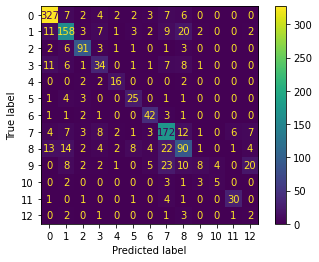

<Figure size 432x288 with 0 Axes>

In [72]:
cm = confusion_matrix(y_true, y_pred, labels=list(range(numberofclass)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(range(numberofclass)))
disp.plot()
plt.savefig("CM_SCOTUS.png")
plt.show()

In [10]:
import umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [51]:
e, l =getsuportset(1)
e=embeddings_validation["embeddings"]
l=embeddings_validation["lableskey"]
reducer = umap.UMAP(random_state=42)
reducer.fit(e)


1


  0%|          | 0/13 [00:00<?, ?it/s]

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [52]:
embedding = reducer.transform(e)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1400, 2)

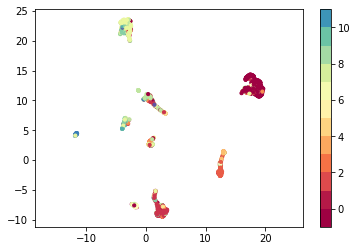

In [54]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=l, cmap='Spectral', s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(13)-1)
#plt.title('UMAP projection of the embedding words', fontsize=24);
plt.savefig("UMAP_Embedding_SCOTUS.png")


In [ ]:
f1 = F1Score(average='micro')
Ttrue_scores = torch.tensor(y_true)
Ttrue_scores = Ttrue_scores.long()
Tpredected_scores = torch.tensor(y_pred)
fmicro =f1(Tpredected_scores, Ttrue_scores)
f1 = F1Score(average='macro', num_classes= numberofclass)
fmacro =f1(Tpredected_scores, Ttrue_scores)
f1 = F1Score()
f1s =f1(Tpredected_scores, Ttrue_scores)
print("score micro is ", fmicro)
print("score macro is ", fmacro)
print("score macro is ", f1s)

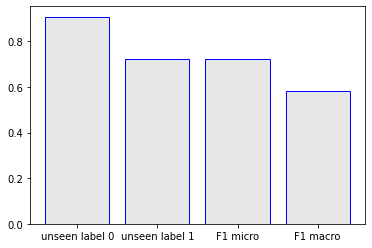

<Figure size 432x288 with 0 Axes>

In [71]:
r0=[0.8958,0.5000, 0.0545, 0.7590, 0.6721]
r=[0.9083, 0.7248, 0.7207, 0.5810]
#bars = ('unseen 0', 'unseen 1','unseen  2', 'F1 micro', 'F1 macro')
bars = ('unseen label 0', 'unseen label 1', 'F1 micro', 'F1 macro')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, r, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.savefig("f1_SCOTUS.png")
# Show graph
plt.show()

In [ ]:
#plt.plot(X,  unseen1Xmicrof1  , marker='D', linewidth=6)

In [ ]:
fmicro=f1_score(y_true, y_pred, average='micro', zero_division=1)
fmacro=f1_score(y_true, y_pred, average='macro', zero_division=1)
print(fmicro, fmacro)